In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
combine = [train, test]

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

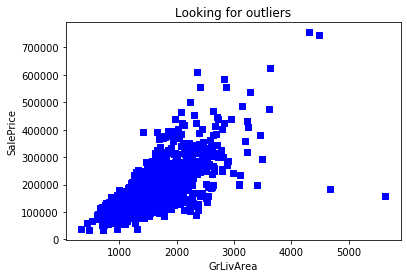

In [4]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4000]
test = test[test.GrLivArea < 4000]

In [5]:
len(test[test.GrLivArea > 4000])

0

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


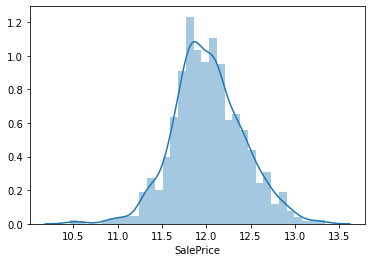

In [6]:
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice
#histogram
sns.distplot(y);

In [7]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
PoolQC         1451    0.997
MiscFeature    1402    0.963
Alley          1365    0.938
Fence          1176    0.808
FireplaceQu     690    0.474
LotFrontage     259    0.178
GarageCond       81    0.056
GarageType       81    0.056
GarageYrBlt      81    0.056
GarageFinish     81    0.056
GarageQual       81    0.056
BsmtExposure     38    0.026
BsmtFinType2     38    0.026
BsmtFinType1     37    0.025
BsmtCond         37    0.025
BsmtQual         37    0.025
MasVnrArea        8    0.005
MasVnrType        8    0.005
Electrical        1    0.001
Utilities         0    0.000

In [8]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
PoolQC         1455    0.998
MiscFeature    1407    0.965
Alley          1351    0.927
Fence          1168    0.801
FireplaceQu     730    0.501
LotFrontage     227    0.156
GarageCond       78    0.053
GarageQual       78    0.053
GarageYrBlt      78    0.053
GarageFinish     78    0.053
GarageType       76    0.052
BsmtCond         45    0.031
BsmtQual         44    0.030
BsmtExposure     44    0.030
BsmtFinType1     42    0.029
BsmtFinType2     42    0.029
MasVnrType       16    0.011
MasVnrArea       15    0.010
MSZoning          4    0.003
BsmtHalfBath      2    0.001

In [9]:
# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
# test.isnull().sum()

In [11]:
# Alley : data description says NA means "no alley access"
test.loc[:, "Alley"] = test.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
test.loc[:, "BedroomAbvGr"] = test.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
test.loc[:, "BsmtQual"] = test.loc[:, "BsmtQual"].fillna("No")
test.loc[:, "BsmtCond"] = test.loc[:, "BsmtCond"].fillna("No")
test.loc[:, "BsmtExposure"] = test.loc[:, "BsmtExposure"].fillna("No")
test.loc[:, "BsmtFinType1"] = test.loc[:, "BsmtFinType1"].fillna("No")
test.loc[:, "BsmtFinType2"] = test.loc[:, "BsmtFinType2"].fillna("No")
test.loc[:, "BsmtFullBath"] = test.loc[:, "BsmtFullBath"].fillna(0)
test.loc[:, "BsmtHalfBath"] = test.loc[:, "BsmtHalfBath"].fillna(0)
test.loc[:, "BsmtUnfSF"] = test.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
test.loc[:, "CentralAir"] = test.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
test.loc[:, "Condition1"] = test.loc[:, "Condition1"].fillna("Norm")
test.loc[:, "Condition2"] = test.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
test.loc[:, "EnclosedPorch"] = test.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
test.loc[:, "ExterCond"] = test.loc[:, "ExterCond"].fillna("TA")
test.loc[:, "ExterQual"] = test.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
test.loc[:, "Fence"] = test.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
test.loc[:, "FireplaceQu"] = test.loc[:, "FireplaceQu"].fillna("No")
test.loc[:, "Fireplaces"] = test.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
test.loc[:, "Functional"] = test.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
test.loc[:, "GarageType"] = test.loc[:, "GarageType"].fillna("No")
test.loc[:, "GarageFinish"] = test.loc[:, "GarageFinish"].fillna("No")
test.loc[:, "GarageQual"] = test.loc[:, "GarageQual"].fillna("No")
test.loc[:, "GarageCond"] = test.loc[:, "GarageCond"].fillna("No")
test.loc[:, "GarageArea"] = test.loc[:, "GarageArea"].fillna(0)
test.loc[:, "GarageCars"] = test.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
test.loc[:, "HalfBath"] = test.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
test.loc[:, "HeatingQC"] = test.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
test.loc[:, "KitchenAbvGr"] = test.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
test.loc[:, "KitchenQual"] = test.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
test.loc[:, "LotFrontage"] = test.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
test.loc[:, "LotShape"] = test.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
test.loc[:, "MasVnrType"] = test.loc[:, "MasVnrType"].fillna("None")
test.loc[:, "MasVnrArea"] = test.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
test.loc[:, "MiscFeature"] = test.loc[:, "MiscFeature"].fillna("No")
test.loc[:, "MiscVal"] = test.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
test.loc[:, "OpenPorchSF"] = test.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
test.loc[:, "PavedDrive"] = test.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
test.loc[:, "PoolQC"] = test.loc[:, "PoolQC"].fillna("No")
test.loc[:, "PoolArea"] = test.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
test.loc[:, "SaleCondition"] = test.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
test.loc[:, "ScreenPorch"] = test.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
test.loc[:, "TotRmsAbvGrd"] = test.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
test.loc[:, "Utilities"] = test.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
test.loc[:, "WoodDeckSF"] = test.loc[:, "WoodDeckSF"].fillna(0)

In [12]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         0
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [13]:
freq = test.MSZoning.dropna().mode()[0]
test.loc[:, "MSZoning"] = test.loc[:, "MSZoning"].fillna(freq)

# Utilities freq
freq = test.Utilities.dropna().mode()[0]
test.loc[:, "Utilities"] = test.loc[:, "Utilities"].fillna(freq)

# BldgType freq 
freq = test.BldgType.dropna().mode()[0]

test.loc[:, "BldgType"] = test.loc[:, "BldgType"].fillna(freq)

# Exterior1st freq
freq = test.Exterior1st.dropna().mode()[0]

test.loc[:, "Exterior1st"] = test.loc[:, "Exterior1st"].fillna(freq)

# Exterior2nd freq
freq = test.Exterior2nd.dropna().mode()[0]

test.loc[:, "Exterior2nd"] = test.loc[:, "Exterior2nd"].fillna(freq)

# BsmtFinSF1 medium
test['BsmtFinSF1'].fillna(int(test['BsmtFinSF1'].dropna().median()), inplace=True)

# BsmtFinSF2 medium
test['BsmtFinSF2'].fillna(int(test['BsmtFinSF2'].dropna().median()), inplace=True)

# BsmtUnfSF medium
test['BsmtUnfSF'].fillna(int(test['BsmtUnfSF'].dropna().median()), inplace=True)

# TotalBsmtSF mediu
test['TotalBsmtSF'].fillna(int(test['TotalBsmtSF'].dropna().median()), inplace=True)

# BsmtFullBath freq
freq = test.BsmtFullBath.dropna().mode()[0]

test.loc[:, "BsmtFullBath"] = test.loc[:, "BsmtFullBath"].fillna(freq)

# BsmtHalfBath freq
freq = test.BsmtHalfBath.dropna().mode()[0]

test.loc[:, "BsmtHalfBath"] = test.loc[:, "BsmtHalfBath"].fillna(freq)

# KitchenQual freq
freq = test.KitchenQual.dropna().mode()[0]

test.loc[:, "KitchenQual"] = test.loc[:, "KitchenQual"].fillna(freq)

# Functional freq
freq = test.Functional.dropna().mode()[0]

test.loc[:, "Functional"] = test.loc[:, "Functional"].fillna(freq)

# GarageCars freq
# freq = test.GarageCars.dropna().mode()[0]

# test.loc[:, "GarageCars"] = test.loc[:, "GarageCars"].fillna(freq)

# # GarageArea medium 
# test['GarageArea'].fillna(int(test['GarageArea'].dropna().median()), inplace=True)

# SaleType freq
freq = test.SaleType.dropna().mode()[0]

test.loc[:, "SaleType"] = test.loc[:, "SaleType"].fillna(freq)

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

test = test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [15]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

test = test.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [16]:
# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [17]:
# 2* Combinations of existing features
# Overall quality of the house
test["OverallGrade"] = test["OverallQual"] * test["OverallCond"]
# Overall quality of the garage
test["GarageGrade"] = test["GarageQual"] * test["GarageCond"]
# Overall quality of the exterior
test["ExterGrade"] = test["ExterQual"] * test["ExterCond"]
# Overall kitchen score
test["KitchenScore"] = test["KitchenAbvGr"] * test["KitchenQual"]
# Overall fireplace score
test["FireplaceScore"] = test["Fireplaces"] * test["FireplaceQu"]
# Overall garage score
test["GarageScore"] = test["GarageArea"] * test["GarageQual"]
# Overall pool score
test["PoolScore"] = test["PoolArea"] * test["PoolQC"]
# Total number of bathrooms
test["TotalBath"] = test["BsmtFullBath"] + (0.5 * test["BsmtHalfBath"]) + \
test["FullBath"] + (0.5 * test["HalfBath"])
# Total SF for house (incl. basement)
test["AllSF"] = test["GrLivArea"] + test["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
test["AllFlrsSF"] = test["1stFlrSF"] + test["2ndFlrSF"]
# Total SF for porch
test["AllPorchSF"] = test["OpenPorchSF"] + test["EnclosedPorch"] + \
test["3SsnPorch"] + test["ScreenPorch"]
# Has masonry veneer or not
test["HasMasVnr"] = test.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
test["BoughtOffPlan"] = test.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [18]:
# test["GarageArea"].head()
# test.isnull().sum()
# test["GarageArea"]
test["GarageScore"]

0      2190.000
1       936.000
2      1446.000
3      1410.000
4      1518.000
5      1320.000
6      1260.000
7      1179.000
8      1518.000
9      1575.000
10     1533.000
11      792.000
12      960.000
13     1320.000
14      924.000
15     2253.000
16     2604.000
17     2190.000
18     2034.000
19     2874.000
20     2268.000
21     1452.000
22     1290.000
23     1311.000
24     1200.000
25     1299.000
26     2886.000
27     2640.000
28     2028.000
29     1584.000
30     1452.000
31     1287.000
32     1383.000
33     2286.000
34     2139.000
35     1518.000
36     1764.000
37     1440.000
38     1440.000
39     1440.000
40     1320.000
41     1488.000
42     2556.000
43     1776.000
44     1788.000
45     1605.000
46     1980.000
47     2034.000
48     1323.000
49     1470.000
50     1512.000
51     1551.000
52     1440.000
53        0.000
54     1200.000
55     1410.000
56      945.000
57     1728.000
58     1860.000
59      924.000
60      936.000
61     1320.000
62      

In [19]:
 test["GarageQual"]

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
30      3
31      3
32      3
33      3
34      3
35      3
36      3
37      3
38      3
39      3
40      3
41      3
42      3
43      3
44      3
45      3
46      3
47      3
48      3
49      3
50      3
51      3
52      3
53      0
54      3
55      3
56      3
57      3
58      3
59      3
60      3
61      3
62      3
63      3
64      3
65      3
66      3
67      3
68      3
69      3
70      3
71      0
72      3
73      2
74      3
75      3
76      2
77      3
78      3
79      0
80      3
81      3
82      3
83      2
84      3
85      3
86      3
87      3
88      3
89      3
90      3
91      3
92      0
93      3
94      3
95      2
96      0
97      3
98      0
99      3


In [20]:
# test.head()

In [21]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features_train = train.select_dtypes(include = ["object"]).columns
numerical_features_train = train.select_dtypes(exclude = ["object"]).columns
numerical_features_train = numerical_features_train.drop("SalePrice")
print("Numerical features train : " + str(len(numerical_features_train)))
print("Categorical features train: " + str(len(categorical_features_train)))
train_num = train[numerical_features_train]
train_cat = train[categorical_features_train]

# categorical_features_test = test.select_dtypes(include = ["object"]).columns
categorical_features_test = pd.Index(['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'GarageFinish', 'Fence', 'MiscFeature', 'MoSold',
       'SaleType', 'SaleCondition'])
numerical_features_test = pd.Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'YrSold', 'OverallGrade', 'GarageGrade',
       'ExterGrade', 'KitchenScore', 'FireplaceScore', 'GarageScore',
       'PoolScore', 'TotalBath', 'AllSF', 'AllFlrsSF', 'AllPorchSF',
       'HasMasVnr', 'BoughtOffPlan'])
# categorical_features_test.append(['GarageQual', 'GarageGrade', 'GarageScore']).columns
# numerical_features_test.pop(['GarageQual', 'GarageGrade', 'GarageScore'])
print("Numerical features test: " + str(len(numerical_features_test)))
print("Categorical features test: " + str(len(categorical_features_test)))
test_num = test[numerical_features_test]
test_cat = test[categorical_features_test]

Numerical features train : 66
Categorical features train: 27
Numerical features test: 66
Categorical features test: 27


In [22]:
# # test_cat.head()
# # categorical_features_train
# pd.Index([, 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
#        'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#        'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
#        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
#        'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
#        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
#        'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars',
#        'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'PoolQC', 'MiscVal', 'YrSold', 'OverallGrade', 'GarageGrade',
#        'ExterGrade', 'KitchenScore', 'FireplaceScore', 'GarageScore',
#        'PoolScore', 'TotalBath', 'AllSF', 'AllFlrsSF', 'AllPorchSF',
#        'HasMasVnr', 'BoughtOffPlan'])

In [23]:
numerical_features_train

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'YrSold', 'OverallGrade', 'GarageGrade',
       'ExterGrade', 'KitchenScore', 'FireplaceScore', 'GarageScore',
       'PoolScore', 'TotalBath', 'AllSF', 'AllFlrsSF', 'AllPorchSF',
       'HasMasVnr', 'BoughtO

In [24]:
train_num = train_num.fillna(train_num.median())
test_num = test_num.fillna(test_num.median())

In [25]:
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

49 skewed numerical features to log transform


In [26]:
skewness = test_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
test_num[skewed_features] = np.log1p(test_num[skewed_features])

47 skewed numerical features to log transform


In [27]:
train_cat = pd.get_dummies(train_cat)
test_cat = pd.get_dummies(test_cat)

In [28]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat, y], axis = 1)
print("New number of features train: " + str(train.shape[1]))

test = pd.concat([test_num, test_cat], axis = 1)
print("New number of features test: " + str(test.shape[1]))

New number of features train: 274
New number of features test: 260


In [29]:
test["GarageScore"]

0      2190.000
1       936.000
2      1446.000
3      1410.000
4      1518.000
5      1320.000
6      1260.000
7      1179.000
8      1518.000
9      1575.000
10     1533.000
11      792.000
12      960.000
13     1320.000
14      924.000
15     2253.000
16     2604.000
17     2190.000
18     2034.000
19     2874.000
20     2268.000
21     1452.000
22     1290.000
23     1311.000
24     1200.000
25     1299.000
26     2886.000
27     2640.000
28     2028.000
29     1584.000
30     1452.000
31     1287.000
32     1383.000
33     2286.000
34     2139.000
35     1518.000
36     1764.000
37     1440.000
38     1440.000
39     1440.000
40     1320.000
41     1488.000
42     2556.000
43     1776.000
44     1788.000
45     1605.000
46     1980.000
47     2034.000
48     1323.000
49     1470.000
50     1512.000
51     1551.000
52     1440.000
53        0.000
54     1200.000
55     1410.000
56      945.000
57     1728.000
58     1860.000
59      924.000
60      936.000
61     1320.000
62      

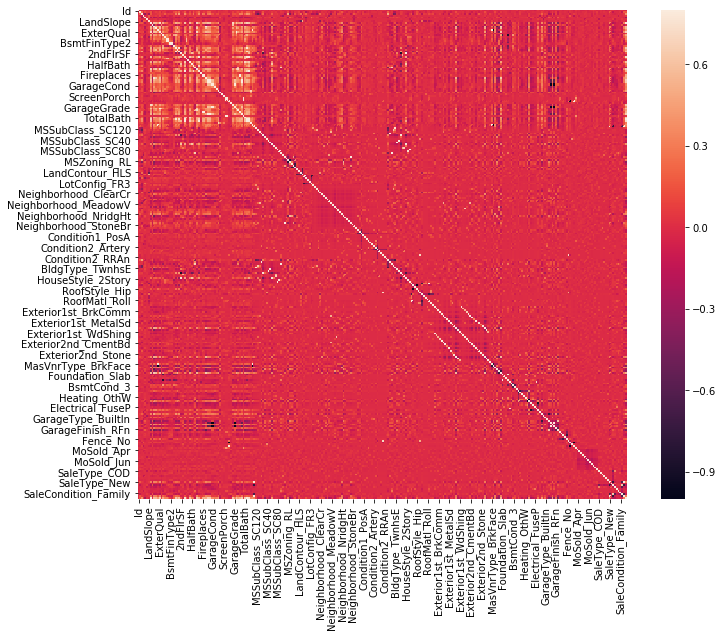

In [30]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

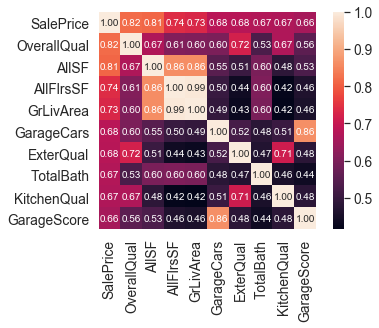

In [31]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice                1.000
OverallQual              0.819
AllSF                    0.811
AllFlrsSF                0.740
GrLivArea                0.733
GarageCars               0.680
ExterQual                0.680
TotalBath                0.673
KitchenQual              0.667
GarageScore              0.657
GarageArea               0.655
TotalBsmtSF              0.642
1stFlrSF                 0.611
OverallGrade             0.604
ExterGrade               0.594
FullBath                 0.591
YearBuilt                0.587
YearRemodAdd             0.569
FireplaceQu              0.547
FireplaceScore           0.539
TotRmsAbvGrd             0.539
Foundation_PConc         0.531
Fireplaces               0.507
BsmtQual                 0.498
GarageYrBlt              0.496
HeatingQC                0.468
OpenPorchSF              0.461
KitchenScore             0.448
GarageType_Attchd        0.416
MasVnrArea               0.416
GarageFinish_Fin      

In [33]:
pd.set_option('display.max_rows', None)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


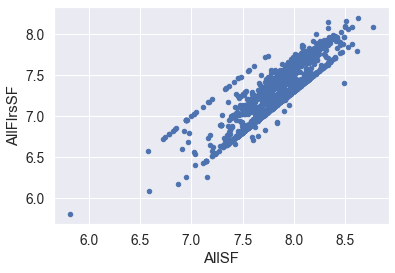

In [34]:
var = 'AllSF'
data = pd.concat([train['AllFlrsSF'], train[var]], axis=1)
data.plot.scatter(x=var, y='AllFlrsSF');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


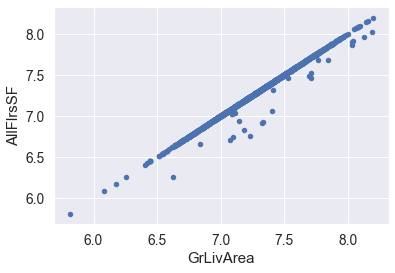

In [35]:
var = 'GrLivArea'
data = pd.concat([train['AllFlrsSF'], train[var]], axis=1)
data.plot.scatter(x=var, y='AllFlrsSF');

In [36]:
train.drop("AllFlrsSF", axis = 1, inplace = True)
train.drop("AllSF", axis = 1, inplace = True)

test.drop("AllFlrsSF", axis = 1, inplace = True)
test.drop("AllSF", axis = 1, inplace = True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


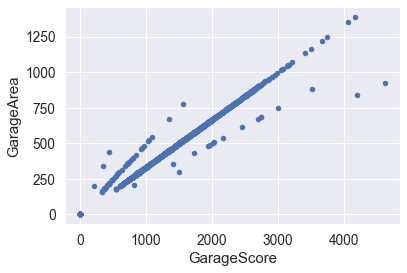

In [37]:
var = 'GarageScore'
data = pd.concat([train['GarageArea'], train[var]], axis=1)
data.plot.scatter(x=var, y='GarageArea');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


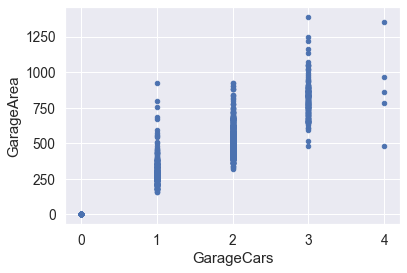

In [38]:
var = 'GarageCars'
data = pd.concat([train['GarageArea'], train[var]], axis=1)
data.plot.scatter(x=var, y='GarageArea');

In [39]:
train.drop("GarageArea", axis = 1, inplace = True)

test.drop("GarageArea", axis = 1, inplace = True)

In [40]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice                1.000
OverallQual              0.819
GrLivArea                0.733
GarageCars               0.680
ExterQual                0.680
TotalBath                0.673
KitchenQual              0.667
GarageScore              0.657
TotalBsmtSF              0.642
1stFlrSF                 0.611
OverallGrade             0.604
ExterGrade               0.594
FullBath                 0.591
YearBuilt                0.587
YearRemodAdd             0.569
FireplaceQu              0.547
FireplaceScore           0.539
TotRmsAbvGrd             0.539
Foundation_PConc         0.531
Fireplaces               0.507
BsmtQual                 0.498
GarageYrBlt              0.496
HeatingQC                0.468
OpenPorchSF              0.461
KitchenScore             0.448
GarageType_Attchd        0.416
MasVnrArea               0.416
GarageFinish_Fin         0.415
LotArea                  0.400
MSSubClass_SC60          0.397
HasMasVnr             

In [41]:
# train.OverallGrade.head()


In [42]:
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])

train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])

train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])

train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])

train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])

train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])

train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

train["TotalBsmtSF-2"] = train["TotalBsmtSF"] ** 2
train["TotalBsmtSF-3"] = train["TotalBsmtSF"] ** 3
train["TotalBsmtSF-Sq"] = np.sqrt(train["TotalBsmtSF"])

train["1stFlrSF-2"] = train["1stFlrSF"] ** 2
train["1stFlrSF-3"] = train["1stFlrSF"] ** 3
train["1stFlrSF-Sq"] = np.sqrt(train["1stFlrSF"])

train["OverallGrade-2"] = train["OverallGrade"] ** 2
train["OverallGrade-3"] = train["OverallGrade"] ** 3
train["OverallGrade-Sq"] = np.sqrt(train["OverallGrade"])

In [43]:
# test["GarageScore"].head()

In [44]:
test["OverallQual-s2"] = test["OverallQual"] ** 2
test["OverallQual-s3"] = test["OverallQual"] ** 3
test["OverallQual-Sq"] = np.sqrt(test["OverallQual"])

test["GrLivArea-2"] = test["GrLivArea"] ** 2
test["GrLivArea-3"] = test["GrLivArea"] ** 3
test["GrLivArea-Sq"] = np.sqrt(test["GrLivArea"])

test["GarageCars-2"] = test["GarageCars"] ** 2
test["GarageCars-3"] = test["GarageCars"] ** 3
test["GarageCars-Sq"] = np.sqrt(test["GarageCars"])

test["ExterQual-2"] = test["ExterQual"] ** 2
test["ExterQual-3"] = test["ExterQual"] ** 3
test["ExterQual-Sq"] = np.sqrt(test["ExterQual"])

test["TotalBath-2"] = test["TotalBath"] ** 2
test["TotalBath-3"] = test["TotalBath"] ** 3
test["TotalBath-Sq"] = np.sqrt(test["TotalBath"])

test["KitchenQual-2"] = test["KitchenQual"] ** 2
test["KitchenQual-3"] = test["KitchenQual"] ** 3
test["KitchenQual-Sq"] = np.sqrt(test["KitchenQual"])

test["GarageScore-2"] = test["GarageScore"] ** 2
test["GarageScore-3"] = test["GarageScore"] ** 3
test["GarageScore-Sq"] = np.sqrt(test["GarageScore"])

test["TotalBsmtSF-2"] = test["TotalBsmtSF"] ** 2
test["TotalBsmtSF-3"] = test["TotalBsmtSF"] ** 3
test["TotalBsmtSF-Sq"] = np.sqrt(test["TotalBsmtSF"])

test["1stFlrSF-2"] = test["1stFlrSF"] ** 2
test["1stFlrSF-3"] = test["1stFlrSF"] ** 3
test["1stFlrSF-Sq"] = np.sqrt(test["1stFlrSF"])

test["OverallGrade-2"] = test["OverallGrade"] ** 2
test["OverallGrade-3"] = test["OverallGrade"] ** 3
test["OverallGrade-Sq"] = np.sqrt(test["OverallGrade"])

In [45]:
numerical_features_train = numerical_features_train.drop(["Id",'AllSF', 'AllFlrsSF', 'GarageArea'])
numerical_features_test = numerical_features_test.drop(["Id",'AllSF', 'AllFlrsSF', 'GarageArea'])

In [46]:
X_train = train.drop(["Id", "SalePrice"], axis = 1)
y_train = train["SalePrice"]
X_test = test

In [47]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features_train] = stdSc.fit_transform(X_train.loc[:, numerical_features_train])
X_test.loc[:, numerical_features_test] = stdSc.transform(X_test.loc[:, numerical_features_test])

In [48]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

# def rmse_cv_test(model):
#     rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
#     return(rmse)

In [57]:
X_train.shape
# X_train.head()

(1456, 299)

In [53]:
X_test.shape
X_test.head()

Id  LotFrontage  LotArea  Street  LotShape  Utilities  LandSlope  \
0  1461        0.670    0.493   0.064     0.660    178.657      0.218   
1  1462        0.700    0.893   0.064    -0.910    178.657      0.218   
2  1463        0.493    0.832   0.064    -0.910    178.657      0.218   
3  1464        0.611    0.196   0.064    -0.910    178.657      0.218   
4  1465       -0.422   -1.148   0.064    -0.910    178.657      0.218   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0       -0.795       24.510     -0.329        -1.154      -0.805     -0.683   
1       -0.065       24.510     -0.428        -1.299       0.984     -0.683   
2       -0.795       18.577      0.853         0.638      -0.805     -0.683   
3       -0.065       24.510      0.886         0.638       0.356     -0.683   
4        1.396       18.577      0.690         0.348      -0.805      1.099   

   ExterCond  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0     -0.206    -0.305        -0.659        -0.256       0.646         1.188   
1     -0.206    -0.305        -0.659         0.694       0.873        -0.238   
2     -0.206     0.494        -0.659         1.168       0.821        -0.238   
3     -0.206    -0.305        -0.659         1.168       0.730        -0.238   
4     -0.206     0.494        -0.659         0.694       0.454        -0.238   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0       2.339     -0.024       -0.409     -1.149    -0.660    -0.867   
1      -0.356      0.195        0.676     -1.149     0.598    -0.867   
2      -0.356     -0.388       -0.298     -0.044    -0.548     1.126   
3      -0.356      0.074       -0.303      0.859    -0.555     1.116   
4      -0.356      0.689        0.557      0.859     0.478    -0.867   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0        -0.134     -1.423        -0.832        -0.242    -1.026    -0.767   
1        -0.134     -0.221        -0.832        -0.242    -1.026     1.263   
2        -0.134      0.400        -0.832        -0.242     0.800     1.263   
3        -0.134      0.353        -0.832        -0.242     0.800     1.263   
4        -0.134     -0.335        -0.832        -0.242     0.800    -0.767   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0        -1.060        -0.208       -0.769        -0.945       0.224   
1         0.166        -0.208        0.746        -0.222       0.224   
2         0.166        -0.208       -0.769        -0.222       0.224   
3         0.166        -0.208        0.746         0.405       0.224   
4        -1.060        -0.208        0.746        -0.945       0.224   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageQual  GarageCond  \
0      -1.012       -1.006   160503.291      -1.025       0.263       0.264   
1      -1.012       -1.006   160256.794      -1.025       0.263       0.264   
2       0.750        0.653   163461.257       0.316       0.263       0.264   
3       0.750        1.206   163543.422       0.316       0.263       0.264   
4      -1.012       -1.006   163050.428       0.316       0.263       0.264   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       0.284       0.964       -1.071         -0.405     -0.129        3.121   
1       0.284       1.360        0.609         -0.405     -0.129       -0.293   
2       0.284       1.123        0.583         -0.405     -0.129       -0.293   
3       0.284       1.326        0.609         -0.405     -0.129       -0.293   
4       0.284      -0.944        0.985         -0.405     -0.129        3.250   

   PoolArea  PoolQC  MiscVal  YrSold  OverallGrade  GarageGrade  ExterGrade  \
0    -0.059  -0.056   -0.191   1.642        -0.416        0.272      -0.663   
1    -0.059  -0.056    7.496   1.642         0.238        0.272      -0.663   
2    -0.059  -0.056   -0.191   1.642        -0.961        0.272      -0.663 

In [56]:
X_train.columns ^ X_test.columns

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'Id', 'MSSubClass_SC150', 'MiscFeature_TenC',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll'],
      dtype='object')

In [49]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 1000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

# print("Try again for more precision with l1_ratio centered around " + str(ratio))
# elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
#                           alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
#                           max_iter = 50000, cv = 10)
# elasticNet.fit(X_train, y_train)
# if (elasticNet.l1_ratio_ > 1):
#     elasticNet.l1_ratio_ = 1    
# alpha = elasticNet.alpha_
# ratio = elasticNet.l1_ratio_
# print("Best l1_ratio :", ratio)
# print("Best alpha :", alpha )

# print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
#       " and alpha centered around " + str(alpha))
# elasticNet = ElasticNetCV(l1_ratio = ratio,
#                           alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
#                                     alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
#                                     alpha * 1.35, alpha * 1.4], 
#                           max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
# print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

output = pd.DataFrame({'Id': test.Id, 'SalePrice': y_test_ela})
output.to_csv('after1.csv', index=False)
print("Your submission was successfully saved!")

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.033698202312544, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.006200861111428, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.872021762093286, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.395457228784428, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.503111787137799, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.997349601186317, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05784646263995796, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.509242453632763, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.384635602692661, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.200691810475897, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.326419737642797, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0475003006100305, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.130783731202094, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.313700851684711, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.289066091421011, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.967596175997677, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.506773854835546, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.056539773427763, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.556509192838584, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0794297993614, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.623611329745349, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.697744722479491, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.132634554410865, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.55353771621147, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.790223366965875, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.20782602107541, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.426962342706311, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.378211549473263, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7760080056303105, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6372079734831715, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.6206370866685305, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.757824694872173, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.457243782907629, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.707686116356976, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1215174206831495, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.537090433119195, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.506129321808137, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8442834344189905, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.817638950434647, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7114314928178525, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.511517817176859, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.880458533286668, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.026011321888015, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.336994480696272, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.508517956923837, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8504963925561295, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.291057042892147, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.997241729789656, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.657320091829417, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.957113153866087, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3168057740583015, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5906506458877026, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.306068516008789, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.110627279821236, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.647591679706583, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.04032167500033, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3541371211517665, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.925650660243593, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.539079384508804, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.649475105783333, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.186629289583994, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.527618150450996, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.768274744950747, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5830650002823425, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.149164665832617, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.050212074971668, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.492178119183999, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.699448327346952, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8132068675873185, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.894102013085398, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.202726073692574, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.555037863139594, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.827886951779839, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1016487371085297, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.214735730620005, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.02766532532404, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.279521375150693, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.479907666982154, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.32845741880273, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.646147538418577, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.920304755106148, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.544518024009971, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.946892934280822, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.060396771727161, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.905054945253849, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.06169178090188, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2232013143977163, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.935580139522482, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.279194655197144, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.549611794940231, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

Best l1_ratio : 0.6
Best alpha : 0.0006


/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.74505047287164, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4679183858638, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.208579276150278, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.915781512218381, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.62774083985991, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.346898408575934, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.01993260047787, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7398358013724255, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.466080864818124, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.793147332623585, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.89995386589691, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.615944344937035, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.574339699235061, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.709003388772636, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.249892019712327, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.05322954830853, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.607756453945647, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07376947520210209, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.053219010813114, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.60462202011657, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.155083820514946, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.70927234991455, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.046945097446676, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.916786743505964, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21030933738357405, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.664756845777578, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.213824465064723, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.00957974519444, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.427907277129639, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.541569391766391, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.332576517122448, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.41132276393286, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.491659034414575, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.043491680833428, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.925209564991928, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.386921559717705, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.294017661968637, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.144655119370093, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.599439540933671, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.940613231045697, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.282319017214538, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.577477894476851, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.18833238570719, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.064165604956753, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.655345055649374, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.345332078715213, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.765905355531193, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.149157633075554, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.640006483554735, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7995557699806568, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.793184719540651, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.426409158806265, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.734290148825712, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.971603668690925, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.1451003359107546, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.609756714485536, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.362674719478128, tolerance: 0.020194673534923595
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1590169691295813, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.391201470374925, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.922114420601259, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1037630005865715, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.405353001375832, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.645838254571077, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2510172339632994, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.740565532122256, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.797734652086806, tolerance: 0.020174603612180462
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.246097662625585, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.575524081089371, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.796650469742095, tolerance: 0.02062630552837189
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.617081047180518, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.992829424513686, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3362256586585595, tolerance: 0.020734567230380523
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.762409482549899, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.417696401663715, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.704412957764081, tolerance: 0.020031339749318235
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.885447729972985, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.060345954694283, tolerance: 0.02082321745098033
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0462041993442526, tolerance: 0.020936211240909077
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.66574259909064, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.908706235646232, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.08311622643675, tolerance: 0.020544204272594353
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.248876273417247, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.008932685998428, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.326413747253373, tolerance: 0.020885353624309783
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.427406010836712, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.661991275032035, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.935580139522482, tolerance: 0.02046731270028061
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

Best l1_ratio : 0.6
Best alpha : 0.0006


/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.981725606805631, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.738544483875437, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10453603054397931, tolerance: 0.018469833813347512
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.508352525287932, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.266599698533834, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.372281186813318, tolerance: 0.01862402577074366
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.292484413431865, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.696269239670809, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.03762821265304, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.389637522376669, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.801793502378457, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.132651862476124, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.42124446833828, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.722052883990486, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.871297582746946, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.055447485386705, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.661665341269877, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.243533169067925, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7606567213367965, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16515442570238292, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.077693278305599, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/skle

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0009936543387035, tolerance: 0.018469833813347512
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7878011768613415, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.617238569636795, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.51135294350766, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.969910023770184, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13438323399265784, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3406961575184475, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8915926008701565, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.213714755026996, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.881248918153986, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6427181390767105, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.69871149462107, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.520758554284598, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.016841945698609, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.470378422818023, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7643730018487975, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.433275213328049, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.660078455248077, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.71087024566615, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.754105251638535, tolerance: 0.01862402577074366
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.016082030956685, tolerance: 0.01862402577074366
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.770005021524838, tolerance: 0.019089160105595956
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.072607374719547, tolerance: 0.019089160105595956
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.339934333806184, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.065142553869921, tolerance: 0.018469833813347512
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.487750886324795, tolerance: 0.018469833813347512
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.857050026039799, tolerance: 0.018469833813347512
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.828848072867357, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1512433745077875, tolerance: 0.018855726930711286
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3354946082787187, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.070687890538679, tolerance: 0.018785036248481598
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5939697407879017, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.436557634632783, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.1368387753232625, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.496137534912006, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.792690317155048, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5539948763343396, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.665096769594342, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.447431773370756, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.261157191951846, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.624068613670872, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.939744566773719, tolerance: 0.018062696716546253
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.49248722689484, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.981243220329095, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.388884411846635, tolerance: 0.018606880530273397
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.826341224371568, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.340522796923889, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.729617327425992, tolerance: 0.018643747821347756
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.508338860771445, tolerance: 0.01862402577074366
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8350557288996, tolerance: 0.01862402577074366
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.098296810419868, tolerance: 0.01862402577074366
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5929745381422125, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.916298986184321, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.160180429626364, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4666638270748447, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.272162524294368, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.397475549736898, tolerance: 0.01853818855010894
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.050281349897875, tolerance: 0.019089160105595956
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.246880036978178, tolerance: 0.019089160105595956
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.657501032908611, tolerance: 0.018926625019881738
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.427817903894727, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.17872547251416, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.945739761607994, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.805650678572009, tolerance: 0.018425666033149612
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05276077228906928, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.14090839383347, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.528854208619829, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.67427734520032, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.402793862431583, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.992952737037966, tolerance: 0.018557233291091213
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.259841658713263, tolerance: 0.018557233291091213
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3445529417212, tolerance: 0.018557233291091213
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.492542083202207, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.789315355352002, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.091200692677083, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.991168757503324, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.056876915239206, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.291579374096562, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5560814129209355, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.758710955400107, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.112200303871937, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.753601200457938, tolerance: 0.017877242816791383
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.799597701270699, tolerance: 0.017877242816791383
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.477231466342006, tolerance: 0.017877242816791383
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.170313436929945, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.431133912815838, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.331638474861041, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.651239566132576, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.095028870756653, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6120482739425395, tolerance: 0.018557233291091213
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8238087472668685, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.11273297144518, tolerance: 0.018425666033149612
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.72170294761986, tolerance: 0.018425666033149612
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.035549587717828, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.490375240297973, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.898036489182092, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.181897718510642, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.626685417386989, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.013864188966503, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.1355791150455925, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.585191324173078, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.957056623644983, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.938473240253845, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.758381495587568, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.566278870657749, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.440869135794589, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.422955490226538, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.940556750518124, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.92764890286091, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.355804501834809, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.767062114801058, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.815504929336018, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.161589711888403, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.457602231433686, tolerance: 0.018359001048499513
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7795632727215285, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.111730106381013, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.377900924878298, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.302417328261196, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.42755673054099574, tolerance: 0.018557233291091213
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0506329355897215, tolerance: 0.018557233291091213
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.58955991387595, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.084018131157494, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.472003982045546, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.457757973150142, tolerance: 0.0189048491446466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1359478653474149, tolerance: 0.01873470712323991
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5338436810595795, tolerance: 0.01873470712323991
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.488259446280546, tolerance: 0.017877242816791383
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.947876729073926, tolerance: 0.017877242816791383
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.661057985932468, tolerance: 0.017877242816791383
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4508381225540905, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.625758925696347, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.486642394017784, tolerance: 0.018668757008594685
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.1299488040357435, tolerance: 0.01873470712323991
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.3712409993604044, tolerance: 0.01873470712323991
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7876324140518314, tolerance: 0.01859659743030298
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01911577775526041, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09310150945817597, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.687909217846155, tolerance: 0.01834484327898395
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.01234963778498, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3716732544407275, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.743163899045862, tolerance: 0.018421633352839265
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.982157881260116, tolerance: 0.020544204272594353
  positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4089805525083072, tolerance: 0.018203501419158184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.980561453786221, tolerance: 0.018203501419158184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coo

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6124057878441205, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5067513599221058, tolerance: 0.017997323624523238
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.847516768249792, tolerance: 0.017997323624523238
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.049871155193482, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.356177172608163, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.532534069577569, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.67275160442253, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.041563471375078, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.314166573504711, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.475708563393014, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.06817388264424, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020818004081721853, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.900356948235654, tolerance: 0.01808115287258095
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8359259955260043, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3289698007238204, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0223456958463615, tolerance: 0.01855191284246682
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3579839602240895, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.23047712563968, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.174009477042592, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.788617888912025, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.277866225019908, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.539314556269841, tolerance: 0.01808115287258095
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.033006057000174, tolerance: 0.01808115287258095
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1574351551104272, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.071364726400788, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.055646684706804, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.641820233655396, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8509500487127175, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.26832037452635, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.83374207427189, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.173228566881439, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.221133791484505, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.872532193177159, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.117857986489253, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8878667700222245, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.548876383702114, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.64423447312463, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0332895292860185, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.507114415890339, tolerance: 0.017997323624523238
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.712111264324918, tolerance: 0.01806925837241934
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.080591404751952, tolerance: 0.01806925837241934
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018889944247021617, tolerance: 0.01855191284246682
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.144326689956216, tolerance: 0.018203501419158184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.574628509864782, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.078084387815375, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.023311549781814, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.916496267880277, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.785181594412407, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.680396160110424, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.126744589259843, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.550782465045519, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.9282727997410785, tolerance: 0.017997323624523238
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.319437836348973, tolerance: 0.017997323624523238
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.636607813697818, tolerance: 0.017997323624523238
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.058526015764237, tolerance: 0.01855191284246682
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.358255259185659, tolerance: 0.01855191284246682
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5694977307111895, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.589223669844998, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.635214529828561, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.544309872853058, tolerance: 0.017715642480870753
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.163878345572407, tolerance: 0.01806925837241934
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.559579582830834, tolerance: 0.01806925837241934
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.902877231793528, tolerance: 0.01806925837241934
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.21820585522908, tolerance: 0.018203501419158184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6578950282522253, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.32661836463065, tolerance: 0.01817336700674134
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.386158570202355, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.792949551505549, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.109240427188847, tolerance: 0.018317414923976805
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0330392408187885, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.292977327475762, tolerance: 0.01824613604297678
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1195015752941515, tolerance: 0.018203501419158184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8183641967866713, tolerance: 0.01808115287258095
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.877018624082726, tolerance: 0.01808115287258095
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.984680573825715, tolerance: 0.01808115287258095
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.791001816716037, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.077688816404404, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.326649908583678, tolerance: 0.01838633166633406
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.085787670081716, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8178539385495665, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.569556757661411, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.775348775218959, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.848360588142518, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.18380479686321, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.07937270775557, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.817077887103947, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.571472972743317, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3580743279149914, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0313410612531255, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.72377198447982, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.9567021662742, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.04423107655432, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.885931882514757, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0387382656232615, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.61879653682751, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.182277211854386, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.229973876220745, tolerance: 0.018183112264945532
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.682407577676296, tolerance: 0.018183112264945532
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.538412476270382, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.450748099194616, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.6780455111577535, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.336305179908047, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.456212281829002, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9011902369708045, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.885405451494456, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.694046525445789, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.168501974049127, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.584655873193976, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.607502179000313, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.102277061919197, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.511244844206386, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.559428443156958, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.038565538999891, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.442878373818454, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.404077209903425, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.864938552348936, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2663402696045445, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.841403100366085, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.292999845882283, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.682177419670209, tolerance: 0.01853157940314184
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.441807015278787, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.796778165795644, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.091188185917021, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.73211629481262, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.014366308567272, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.987239483317045, tolerance: 0.018048964243260014
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.658069383606881, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9390549689336085, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.035198733169297, tolerance: 0.018183112264945532
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.722685373636317, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.052826520155406, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.184148381992564, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1416619315346281, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.393546473080674, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.900008606471568, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.588141389962363, tolerance: 0.017954835710738807
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.119015275293204, tolerance: 0.017954835710738807
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5418798829651195, tolerance: 0.017954835710738807
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.328945792901663, tolerance: 0.018048964243260014
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.68217269927095, tolerance: 0.018048964243260014
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.917614209303953, tolerance: 0.018048964243260014
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.6943584326943855, tolerance: 0.018183112264945532
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.945104083391634, tolerance: 0.018183112264945532
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.707107266225698, tolerance: 0.01815382668935205
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.014829899738276, tolerance: 0.01806140931791003
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1538738700154632, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.129527701863745, tolerance: 0.01829719312998778
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.338786875114279, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0497043019866865, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.483980317110889, tolerance: 0.018225975925478692
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.217078969297413, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.543002392147798, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.797247324721194, tolerance: 0.017734278448531347
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.399211747959873, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.905497269090558, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.628358915148763, tolerance: 0.018366317629526667
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.896162935813885, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.624224966039343, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.371344309043248, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.284448402460343, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02371047164881901, tolerance: 0.018153749836519944
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.66645673146581, tolerance: 0.018153749836519944
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.124466259561937, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.843303746664867, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.561766122994671, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2722106849742456, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.433902429577139, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.716169466551635, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8831230131971415, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4533550313127455, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5648127950017425, tolerance: 0.018153749836519944
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/skle

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.936305927204928, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.485531826023239, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.095124000449589, tolerance: 0.018223114220989534
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.490300494388707, tolerance: 0.018039475730525296
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4011294629022473, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.396213487928015, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.72513218806726, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.669821568867444, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.239158255125075, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.55331502752473, tolerance: 0.018223114220989534
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.562587279108479, tolerance: 0.018223114220989534
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.147283965697065, tolerance: 0.018223114220989534
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.938823933303911, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.366846262083124, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.766038207874733, tolerance: 0.018011170256610844
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6806530351021784, tolerance: 0.018153749836519944
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.807724716387751, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.59124529946691, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.337729749497752, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.79855818461124, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.209228248948434, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.581080053161194, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.032944038975142, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.471764541902123, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.622670284686075, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.058917415881504, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.439661995681244, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.355271176327729, tolerance: 0.017812071410521466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.292660696462532, tolerance: 0.017812071410521466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.8212079663532235, tolerance: 0.017812071410521466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5681045543745178, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.668291159263703, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.188170777569809, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.074152021521134, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.418463562856134, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.709097598645737, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.9940712826234765, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.910785117929054, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.514359583242608, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.588480619645601, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.854424238530475, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9555998696303867, tolerance: 0.018223114220989534
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9445656196284151, tolerance: 0.017812071410521466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.505333942805219, tolerance: 0.017812071410521466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.522732191547176, tolerance: 0.017812071410521466
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.282171353349685, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6640434935333195, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.059072307952647, tolerance: 0.017905437428648998
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.164765905921427, tolerance: 0.018039475730525296
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.478878258852466, tolerance: 0.018039475730525296
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.744685443164526, tolerance: 0.018039475730525296
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.85262565923718, tolerance: 0.018069953962144832
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27217730382758987, tolerance: 0.018153749836519944
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.978075557880262, tolerance: 0.018153749836519944
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1902670133261957, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.720990178640746, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.1150439323742685, tolerance: 0.018082603846207343
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.13566217055583, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.70501628575221, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.106693356916624, tolerance: 0.0175832563189996
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.420486368691174, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.722660468337909, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9361449220020805, tolerance: 0.01838800719940736
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.935337546253191, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.700583439521822, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21400177818301813, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.779918827876809, tolerance: 0.018439181707015882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.548872568082573, tolerance: 0.018439181707015882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09208406375767098, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.990609909681634, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.308064220014494, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.468051549303829, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.096597577704435, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.393949103245211, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.551435937575695, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.418173946980376, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.234567267121935, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.458346575971875, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.212916762347196, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.673373531483293, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.163696771411757, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.781772175303319, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.099904396692994, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.375149631858735, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.213461810492861, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.864140173718596, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.351074837163639, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.729811833499666, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6110145830007525, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.948778860165743, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.74429159696576, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.226256438411649, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.668180725826394, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.893642629194611, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.07847348400691, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.417767704386037, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3299400032222586, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.483829715362111, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.440657108218112, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.17040645481792, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.238070439188872, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.622594588863343, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.621685199163116, tolerance: 0.018439181707015882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.98741222060197, tolerance: 0.018439181707015882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.368026018522942, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.600999843829442, tolerance: 0.019244327179410874
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.974646503175589, tolerance: 0.019244327179410874
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.302253971713633, tolerance: 0.019244327179410874
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.123191811426968, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.401746350599317, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.983458167287121, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.216049875046625, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4837086281180705, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.411106593229291, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.881083179886769, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.312939554243508, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.613456408407788, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.552850571251021, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.016701647071683, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.4086223519131895, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.815535413405843, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.323465142128801, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.722220466542416, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.013061069642294, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.45886696599341, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.857863587104211, tolerance: 0.018662040511741196
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.667554999656771, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.010090531366805, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.237285251755827, tolerance: 0.018761400607605044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.04528603881003, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.270411912398652, tolerance: 0.018896301410007414
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0157940374104903, tolerance: 0.018860291418378486
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.993772751407209, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.007138512459207, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0841048239694295, tolerance: 0.018592956729394556
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.409261048130018, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.816407202210847, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.130402021436483, tolerance: 0.018937350660381012
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.9078679453630265, tolerance: 0.018439181707015882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.142976001718109, tolerance: 0.018439181707015882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5542267152710885, tolerance: 0.0184862377994728
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.469165596623805, tolerance: 0.019244327179410874
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5572950590837564, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.284639926654307, tolerance: 0.019076535125119892
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.216129213982199, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.956153107205015, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.708114815597583, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.251525246814061, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.481381734107832, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.372706577612307, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.450379994533487, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.188759971272042, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.933368768246449, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.30656306591161, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.922848801815828, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.196348442918353, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.907851576454743, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.783126938886777, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.843801007708949, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.924195396884866, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.196039559853903, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.24898467817678, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.601765003656689, tolerance: 0.018615842591049273
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.311926262545764, tolerance: 0.018615842591049273
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.855088834936433, tolerance: 0.018615842591049273
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.750918560445139, tolerance: 0.018201377627164828
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.525911002956091, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.825602127380881, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1554627253311045, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.143412598199686, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.756128438973471, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.414693377149974, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.851092618928082, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.922805341809298, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04512816617480553, tolerance: 0.01862782645818408
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.07249951716639, tolerance: 0.01862782645818408
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.555041943277326, tolerance: 0.01862782645818408
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.111224489442203, tolerance: 0.018676018116158547
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.55828987988644, tolerance: 0.018676018116158547
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.960122776343102, tolerance: 0.018676018116158547
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4595218366887295, tolerance: 0.018201377627164828
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.867904690824648, tolerance: 0.018201377627164828
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9643411321860018, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9240978053747924, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.857407633561522, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.067765014378814, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.059513955050589, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.504196607031784, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.902644653626421, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.751151668494882, tolerance: 0.018223374328203177
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6360303632367366, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.087572918571475, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.355281637421344, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7424493147597735, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.053012887275937, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.881275511114786, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.16703367577525, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.880258138317486, tolerance: 0.018201377627164828
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2035579145653665, tolerance: 0.01862782645818408
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7722212241844133, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.129991553823512, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.365417716500107, tolerance: 0.018615842591049273
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.749995596181324, tolerance: 0.018615842591049273
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0492624401289055, tolerance: 0.018615842591049273
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7811129539726487, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.007410371464623, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.9808252373178625, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.834062880066115, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.107434361458155, tolerance: 0.01881846106889969
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3306697955506053, tolerance: 0.018676018116158547
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.630597876123305, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.972073232733949, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.218515535016113, tolerance: 0.018387456054338464
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.038048998743462, tolerance: 0.01862782645818408
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.258367937080854, tolerance: 0.01862782645818408
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9041892247114234, tolerance: 0.018979129220393975
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.568459214748925, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6123344792031737, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.878334627026184, tolerance: 0.018626585537132707
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.507387283483736, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.85651472445831, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.10804342052606, tolerance: 0.018470003762368344
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.254730021186102, tolerance: 0.02062630552837189
  positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5747874981051417, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.969241022478, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordi

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.121047336845212, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8879892455364145, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.223155297183649, tolerance: 0.018399098562028524
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.503142267888176, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2200219116334425, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.940562103481709, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.593126707046723, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.322031767734092, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.058824212112749, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.543649335205855, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1048878159296756, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2166705242807723, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.074549583158991, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.619418318141973, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9250149210875787, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.309370725851504, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.882345687020383, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1262792041417597, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6169880880687195, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.118484383703009, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.551388865971358, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7727151962407355, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.145665461146939, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.29996585156655, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.121172425693343, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.583316936498205, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.023018358521683, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.133620878572036, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.550293086022138, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.524523875316032, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.488021867368802, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8404252347447585, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48119294393707435, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/skle

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.935541470355875, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.406400283086105, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.809932582617616, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.165554139902707, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.603017640212698, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.978004267311886, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.130167881487331, tolerance: 0.018871334357171
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.596781482619825, tolerance: 0.018871334357171
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.97561032778556, tolerance: 0.018871334357171
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mo

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.670213916514149, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.602683939173902, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.128298335063894, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.811524901459839, tolerance: 0.018399098562028524
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.135641742063202, tolerance: 0.018399098562028524
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.047177266374897, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.204215124007063, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.341510931853169, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.367893337521732, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.655518891790293, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.995439865063668, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.445175536497514, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7626175005183224, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.992882891359966, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.3950751983851974, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.32689107254337, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.735526248391526, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0703893833233, tolerance: 0.019015324819448044
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4709873309205665, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.137453126123855, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.123023394478031, tolerance: 0.01858303808899603
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.26871932264902, tolerance: 0.018666027181571877
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.809475777181312, tolerance: 0.018871334357171
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.25060181372202, tolerance: 0.018871334357171
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.339670369497842, tolerance: 0.018873417460599052
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7540659462896695, tolerance: 0.018873417460599052
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.085267659775934, tolerance: 0.018873417460599052
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.506140055801488, tolerance: 0.018399098562028524
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.718629481029343, tolerance: 0.018399098562028524
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.053178700562126, tolerance: 0.018399098562028524
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.319240651866952, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.705605167703308, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.044719231344614, tolerance: 0.018933974766362084
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.259174053666951, tolerance: 0.018813979131674218
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0156138151918626, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.337319825724048, tolerance: 0.018821843574239865
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6079885758296415, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.903279973027557, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.075477706934366, tolerance: 0.018420795998202903
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.050351442093701, tolerance: 0.018873417460599052
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.467487086558333, tolerance: 0.018873417460599052
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.861735591046642, tolerance: 0.018873417460599052
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.720011824588277, tolerance: 0.018687385057754625
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4646699948700395, tolerance: 0.018687385057754625
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.211605574815082, tolerance: 0.018687385057754625
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.104790105895747, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.403325323983101, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5990307729194635, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7915974264664563, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7598375096433365, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.379318760063693, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.800231410057294, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.368219532396669, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.943536984484773, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.702043716850471, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.302497110408501, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.903391003377494, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.36743945062099, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.952379488496738, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.520366822724588, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.472237292407531, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.288315378812663, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.868271454888807, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.295953162132615, tolerance: 0.018687385057754625
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6107153854880245, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.228947408114971, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.808013777188565, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.329248962457811, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.794543349247797, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5818565178528328, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.252211308392006, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.230407444111796, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2175157896986475, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.662320480203305, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.104924375426852, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.348401391921232, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.868321162124029, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.357751005327583, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.992903007277095, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.75168870197676, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.270600802840644, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.608613157594544, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.592872701776114, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.052416781104749, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0386564692771305, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.572456897587108, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.094474856774138, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.398751812614949, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.438313579983893, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.048170550247196, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.425607927374419, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.625465881173353, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.962726327266106, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8895250868297033, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.325996261561554, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.559140254884885, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.423789818967567, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.591434836158328, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.075029150420116, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.217212076717183, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.833692060816178, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.32216123021768, tolerance: 0.018988378532142906
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.597989368545563, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.946065081263123, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.264506655848912, tolerance: 0.018515937901019446
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.085379685453595, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.354562354873433, tolerance: 0.018900287135549535
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.936779519968608, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.592422680318817, tolerance: 0.01892429821658581
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3636655009051246, tolerance: 0.018687385057754625
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.515627978439838, tolerance: 0.018687385057754625
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.736723935597972, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.881917854106645, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5952418518163736, tolerance: 0.018989181557455596
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.944335418689036, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.46670596083104, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.838124825727445, tolerance: 0.01893323837443341
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.126044070089613, tolerance: 0.01853588746346532
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8839931920547173, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.845713052254158, tolerance: 0.018772952082272896
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.4840247810840825, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.853188828410246, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.161682215696426, tolerance: 0.019163427269780143
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.377409427995872, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.10392956467524, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.837513041782583, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.902842988199236, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.62130039979306, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.347425111401052, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.639786265326538, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.969892862837105, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1559838676737595, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43567435391076614, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.674283073893527, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.712197364282222, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.115036044386061, tolerance: 0.018226336549270618
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7086694830159255, tolerance: 0.018226336549270618
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.413198583123433, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.433332638668897, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.001860742858593, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.582227087270547, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.568634336895501, tolerance: 0.018717584320757295
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.125814352796663, tolerance: 0.018717584320757295
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.699041123351042, tolerance: 0.018717584320757295
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.914701373127819, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7659919943073756, tolerance: 0.018226336549270618
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.993539490103645, tolerance: 0.018226336549270618
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.291398198885955, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.802018695505527, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.269692298619766, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.841263327050699, tolerance: 0.018717584320757295
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.203124073340856, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.503344445318249, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.591756426147903, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.608982116391813, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.286044830943228, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.915275316458186, tolerance: 0.018515982325620964
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.384135837249915, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.5438484441436, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8812263949025745, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.028652193747842, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.607410704655498, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.449798220901897, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.502015111421917, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.362969162656489, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.579594457086426, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.060886366770415, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.47448355462338, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.86555087365709, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7545256340682567, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.243192796251514, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6029793994714625, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.975451337028135, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.347507626388008, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.42747236509648, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.644326113818581, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.294590488724106, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.068552138600557, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.646643921185813, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0967311738085765, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/line

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.235097622474327, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.620346254025782, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.899342801303437, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.893923944447679, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.15328401207223, tolerance: 0.018464952874057507
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.681028357798283, tolerance: 0.018226336549270618
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.95317725333242, tolerance: 0.018309583336703412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0272176203864802, tolerance: 0.018515982325620964
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.555906961532475, tolerance: 0.018515982325620964
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.170604915503283, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.995878606915332, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.22610277596652, tolerance: 0.018458768824001152
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.757292382051006, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.156816192091535, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.468063415305105, tolerance: 0.018065168498270386
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.105774462935224, tolerance: 0.018717584320757295
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7679705457107637, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.081864645024517, tolerance: 0.018962747848264412
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.038060399261395, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.878940249216395, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.596018054206088, tolerance: 0.0180436457827948
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linea

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.904299386128039, tolerance: 0.018515982325620964
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.133733607833554, tolerance: 0.018515982325620964
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.144272195266332, tolerance: 0.018429836136590882
  tol, rng, random, positive)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn

ElasticNet RMSE on Training set : 0.10746885406585927


ValueError: shapes (1458,287) and (299,) not aligned: 287 (dim 1) != 299 (dim 0)